In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", None)
pd.set_option("precision", 3)
%pylab inline
%config InlineBackend.figure_formats = ['retina']
sns.set_context("talk") # talk context is good for RISE presentations

Populating the interactive namespace from numpy and matplotlib


# **1. Read the data**

In [3]:
fn = '../data/US_Accidents_Dec20.csv'
df = pd.read_csv(fn)
df.head(3)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.00,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.87,-84.06,nan,nan,0.01,Right lane blocked due to accident on I-70 Eas...,nan,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.90,nan,91.00,29.68,10.00,Calm,nan,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.00,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.93,-82.83,nan,nan,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,"2,584.00",Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.90,nan,100.00,29.65,10.00,Calm,nan,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.00,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.06,-84.03,nan,nan,0.01,Accident on OH-32 State Route 32 Westbound at ...,nan,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.00,33.30,100.00,29.67,10.00,SW,3.50,nan,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


# **2. Inspect severity vs. traffic time delay and impacted distance**

## **2.1 Inspact severity vs. traffic time delay**

In [4]:
# covnert string to pandas datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
# calculate duration as the difference between end time and start time in minute
df['Duration'] = df.End_Time - df.Start_Time 
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )

In [5]:
df_dist_dur = df[['Distance(mi)', 'Duration', 'Severity']].copy()

In [6]:
idx = df_dist_dur[df_dist_dur['Duration'] > 1e4].index

In [8]:
df_dist_dur.head()

,Distance(mi),Duration,Severity
0,0.01,314,3
1,0.01,30,2
2,0.01,30,2
3,0.01,30,3
4,0.01,30,2


## **2.2 Inspact severity vs. impacted distance**

In [9]:
df_dist = df_dist_dur.groupby('Severity', as_index=False)['Distance(mi)'].mean()
df_dist.columns = ['Severity', 'mean_dist']
df_dist['std_dist'] = df_dist_dur.groupby('Severity', as_index=False)['Distance(mi)'].std()['Distance(mi)']
df_dist

,Severity,mean_dist,std_dist
0,1,0.20,1.00
1,2,0.25,1.12
2,3,0.41,2.15
3,4,1.76,3.85


In [10]:
df_dist_dur.shape

(4229394, 3)

In [11]:
idx = df_dist_dur[df_dist_dur['Distance(mi)'] == 0].index
print(len(idx))
df.iloc[idx]['Severity'].unique()

2674899


array([2, 1, 3, 4], dtype=int64)

In [12]:
df_dur = df_dist_dur.groupby('Severity', as_index=False)['Duration'].mean()
df_dur.columns = ['Severity', 'mean_duration']
df_dur['std_duration'] = df_dist_dur.groupby('Severity', as_index=False)['Duration'].std()['Duration']
df_dur

,Severity,mean_duration,std_duration
0,1,40.58,46.29
1,2,129.94,"2,415.73"
2,3,77.80,"1,828.70"
3,4,761.15,"15,933.01"


# **3. Visualization with boxplot**

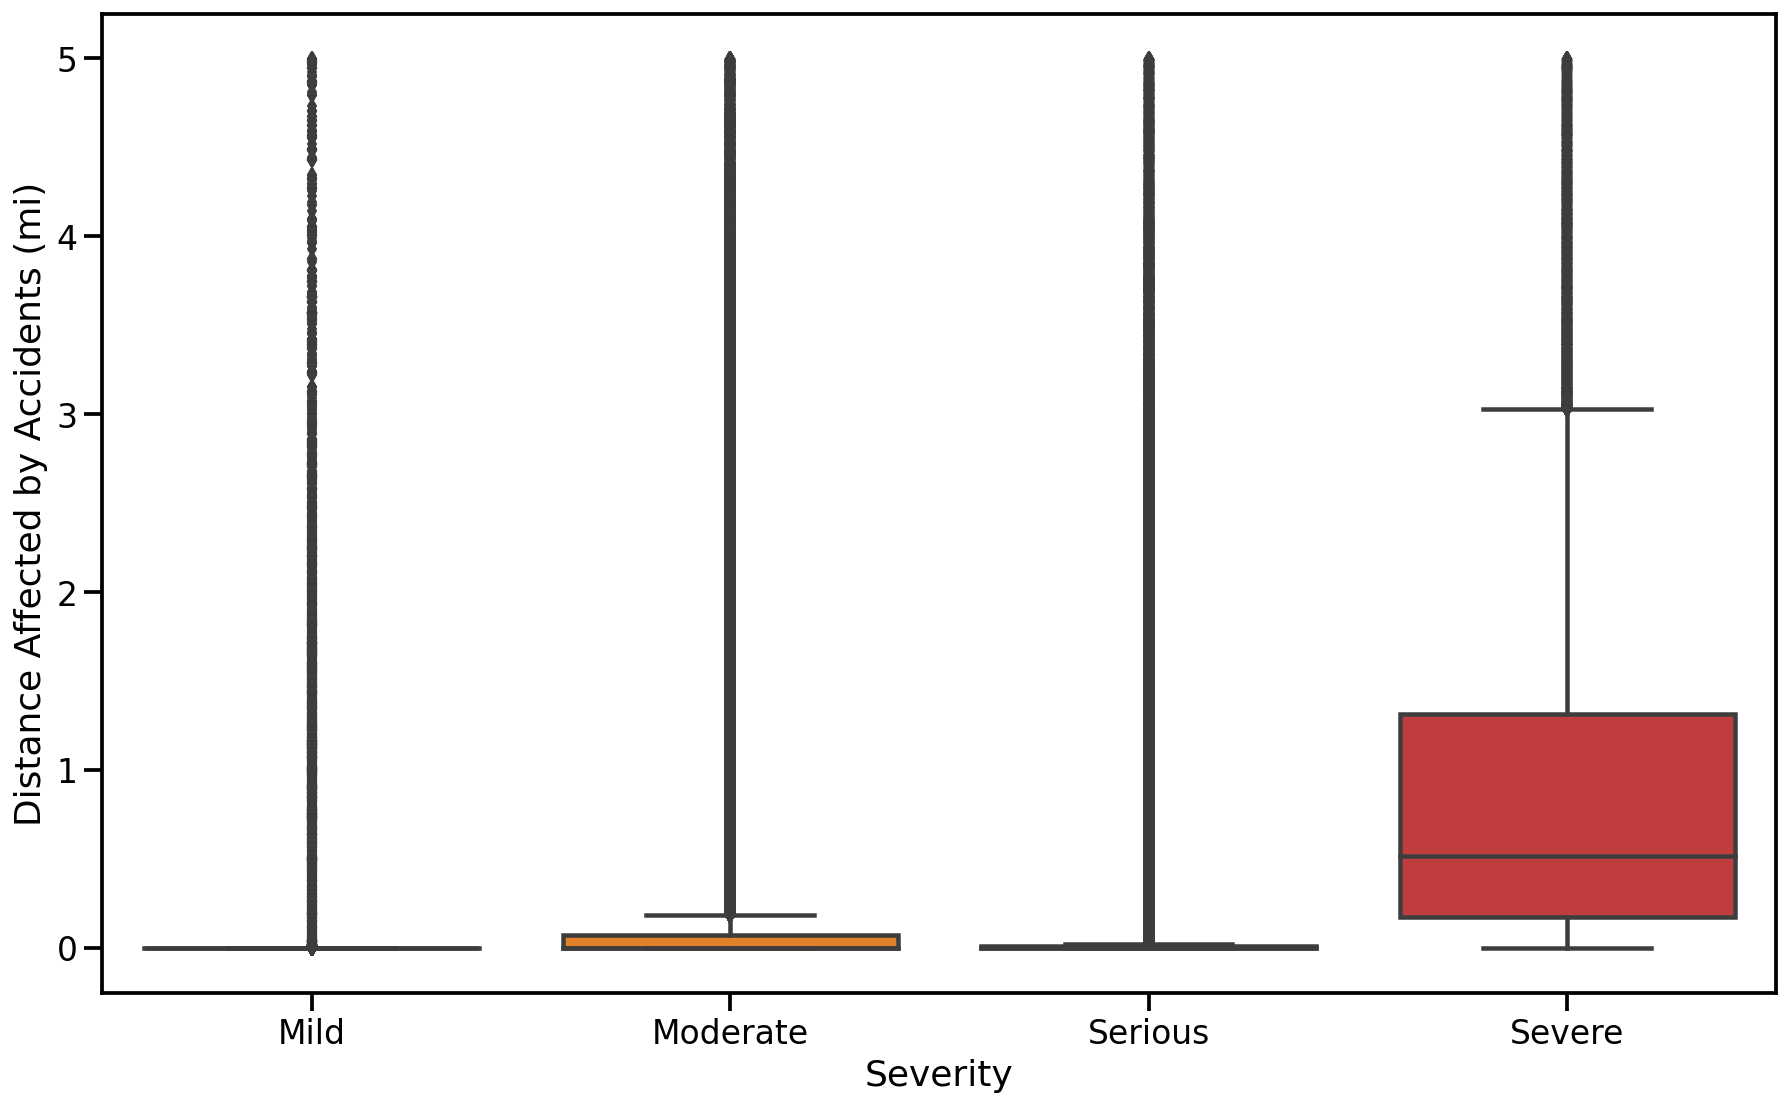

In [13]:
plt.subplots(figsize=(15,9))
ax = sns.boxplot(data=df_dist_dur[df_dist_dur['Distance(mi)'] < 5], y='Distance(mi)', x='Severity',  palette='tab10')
ax.set_ylabel('Distance Affected by Accidents (mi)')
ax.set_xticklabels(['Mild', 'Moderate', 'Serious', 'Severe']);
plt.savefig('../figures/distance_affected.png', dpi=300)

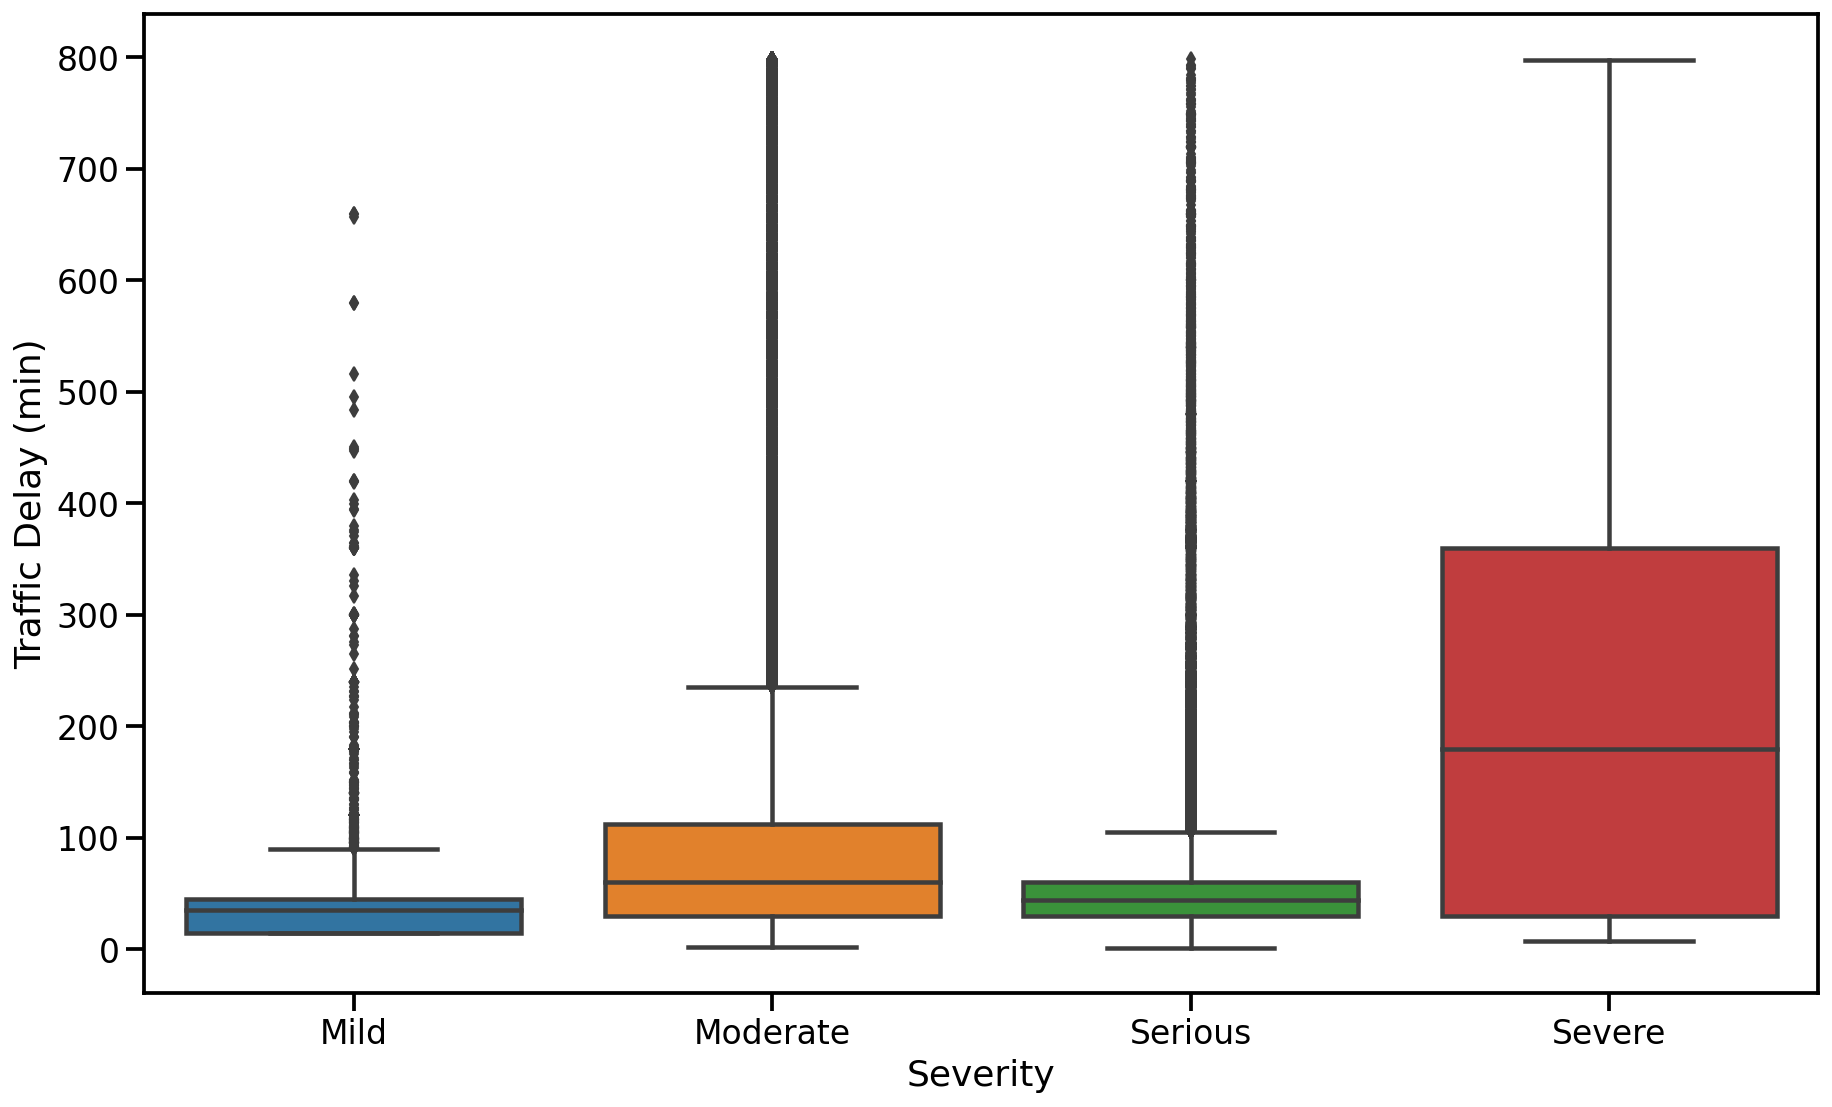

In [14]:
plt.subplots(figsize=(15,9))
ax = sns.boxplot(data=df_dist_dur[df_dist_dur['Duration'] < 800], y='Duration', x='Severity',  palette='tab10')
ax.set_ylabel('Traffic Delay (min)')
ax.set_xticklabels(['Mild', 'Moderate', 'Serious', 'Severe']);
plt.savefig('../figures/traffic_delay.png', dpi=300)